#Import Libraries

In [ ]:
!pip install pandas
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats

#Import data

In [ ]:
casesTrain = pd.read_csv('https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/cases_train.csv')
casesTest = pd.read_csv('https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/cases_test.csv')
location = pd.read_csv('https://raw.githubusercontent.com/MadanKrishnan97/CMPT459CourseProjectSpring2021/main/dataset/location.csv')
population = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')


#1.1 Exploratory Data Analysis

In [ ]:
def cleanAge(age):
    if type(age) == float:
        if age < 1:
            return 1
        return int(math.ceil(float(age)))
    if type(age) != int and '+' in age:
        split_age = age.split("+")
        return int(split_age[0])
    if type(age) != int and 'month' in age:
        return 1
    if type(age) != int and 'May' in age:
        return 1
    if type(age) != int and 'Oct' in age:
        return 1
    if type(age) != int and '-' in age:
        split_age = age.split("-")
        lower_age = int(split_age[0])
        if split_age[1] != '':
            upper_age = int(split_age[1])
        else:
            upper_age = 0
        avg_age = math.floor((lower_age + upper_age)/2)
        return int(avg_age)
    return int(math.ceil(float(age)))
    
def getAverageAge(ages):
    count = 0
    total = 0
    for age in ages:
        if age != -1 and type(age) == int:
            count = count + 1
            total += age
    return math.floor(total/count)  

def cleanCases(data):
    data = data.drop(['source', 'additional_information'], axis=1) ## drop irrelevant columns
    data.age.fillna(-1, inplace=True) ## replace all Nan with -1
    data.sex.fillna('unknown', inplace=True) ## replace all Nan with -1
    data['age'] = data.age.apply(cleanAge)  ## format all ages. If age is a range get the middle of range, if range is float convert to int. All months and fractional ages are bumped to age 1
    avg = getAverageAge(data['age'])
    data['age'] = data['age'].replace({-1:avg})   ## replace Nan(-1) with average age rounded down
    data['date_confirmation'] = data['date_confirmation'].replace({'\.':'/'}, regex=True)
    data['date_confirmation'] = data['date_confirmation'].str.slice(0,10)
    data['date_confirmation'] = pd.to_datetime(data['date_confirmation'])
    return data

def addCombineKey(data, countryInd, provinceInd):
    data['combinedKey'] = ''
    for ind in data.index:
      country = data.iloc[ind,countryInd]
      province = data.iloc[ind,provinceInd]
      if pd.isna(data.iloc[ind,provinceInd]) == True:
        data.at[ind,"combinedKey"] = country
      else:
        joined = str(province) + ", " + str(country)
        data.at[ind,"combinedKey"] = joined 
    return data

In [ ]:
casesTrain.loc[casesTrain['country'] == 'United States', 'country'] = 'US'
casesTrain = cleanCases(casesTrain)
addCombineKey(casesTrain, 3, 2)

,age,sex,province,country,latitude,longitude,date_confirmation,outcome,combinedKey
0,43,unknown,Delhi,India,28.614740,77.209100,2020-05-26,recovered,"Delhi, India"
1,43,unknown,Uttar Pradesh,India,25.436090,81.847180,2020-05-20,hospitalized,"Uttar Pradesh, India"
2,43,unknown,Maharashtra,India,18.504220,73.853020,2020-05-26,hospitalized,"Maharashtra, India"
3,24,female,Baden-Wurttemberg,Germany,48.120860,7.849500,2020-03-15,nonhospitalized,"Baden-Wurttemberg, Germany"
4,43,unknown,Gujarat,India,23.188409,73.647122,2020-05-20,hospitalized,"Gujarat, India"
...,...,...,...,...,...,...,...,...,...
367631,15,male,Santa Fe,Argentina,-32.967800,-60.659240,2020-03-31,nonhospitalized,"Santa Fe, Argentina"
367632,43,unknown,Delhi,India,28.614740,77.209100,2020-04-16,hospitalized,"Delhi, India"
367633,43,unknown,Maharashtra,India,19.200000,72.966670,2020-05-30,hospitalized,"Maharashtra, India"
367634,28,female,NaN,Singapore,1.280224,103.834500,2020-03-02,recovered,Singapore


In [ ]:
#casesTrain = casesTrain.drop('province', 1)
#casesTrain = casesTrain.drop('country', 1)
casesTrain = casesTrain.drop('latitude', 1)
casesTrain = casesTrain.drop('longitude', 1)

#casesTest = casesTest.drop('province', 1)
#casesTest = casesTest.drop('country', 1)
casesTest = casesTest.drop('latitude', 1)
casesTest = casesTest.drop('longitude', 1)

In [ ]:
casesTrain = casesTrain[pd.notnull(casesTrain['date_confirmation'])]
casesTrain = casesTrain[pd.notnull(casesTrain['combinedKey'])]
casesTest = casesTrain[pd.notnull(casesTrain['date_confirmation'])]
casesTest = casesTrain[pd.notnull(casesTrain['combinedKey'])]

In [ ]:
casesTrain.isna().sum()
casesTest.isna().sum()

age                     0
sex                     0
province             4082
country                16
date_confirmation       0
outcome                 0
combinedKey             0
dtype: int64

In [ ]:
casesTrain

,age,sex,province,country,date_confirmation,outcome,combinedKey
0,43,unknown,Delhi,India,2020-05-26,recovered,"Delhi, India"
1,43,unknown,Uttar Pradesh,India,2020-05-20,hospitalized,"Uttar Pradesh, India"
2,43,unknown,Maharashtra,India,2020-05-26,hospitalized,"Maharashtra, India"
3,24,female,Baden-Wurttemberg,Germany,2020-03-15,nonhospitalized,"Baden-Wurttemberg, Germany"
4,43,unknown,Gujarat,India,2020-05-20,hospitalized,"Gujarat, India"
...,...,...,...,...,...,...,...
367631,15,male,Santa Fe,Argentina,2020-03-31,nonhospitalized,"Santa Fe, Argentina"
367632,43,unknown,Delhi,India,2020-04-16,hospitalized,"Delhi, India"
367633,43,unknown,Maharashtra,India,2020-05-30,hospitalized,"Maharashtra, India"
367634,28,female,NaN,Singapore,2020-03-02,recovered,Singapore


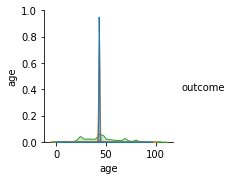

In [ ]:
sns.pairplot(casesTrain, hue = 'outcome')

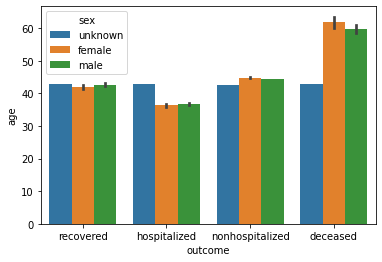

In [ ]:
sns.barplot(data=casesTrain, x='outcome', y='age', hue='sex')

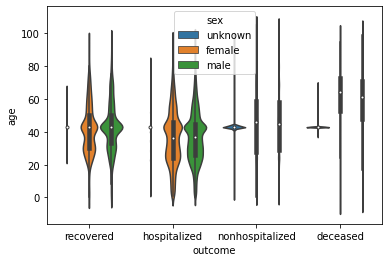

In [ ]:
sns.violinplot(data=casesTrain, x='outcome', y='age', hue='sex')

In [ ]:
plot = sns.scatterplot(y="latitude", x="longitude", data=casesTrain, hue='outcome', s=1)

ValueError: ignored

In [ ]:
casesTrain.describe()


```
Cleaning Location
```



In [ ]:
location = location.drop(['Last_Update'], axis=1) ## only 3 different dates, not meaningful

In [ ]:
location.Active.fillna(0, inplace=True)
location.Incidence_Rate.fillna(0, inplace=True)  ## most Nan incidence Rate and case-fatality ratio are dividing by zero or zero devided by denominator and hence no valid value or zero
location['Case-Fatality_Ratio'].fillna(0, inplace=True)
location.Active = location.Active.apply(lambda x: int(x))
location['Active'] = location['Active'].clip(lower=0)  ## negative should be 0

In [ ]:
location.head()

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,33.93911,67.709953,38919,1437,32576,4906,Afghanistan,99.976005,3.692284
1,NaN,Albania,41.15330,20.168300,12226,358,6888,4980,Albania,424.838418,2.928186
2,NaN,Algeria,28.03390,1.659600,49623,1665,34923,13035,Algeria,113.162645,3.355299
3,NaN,Andorra,42.50630,1.521800,1564,53,1164,347,Andorra,2024.202420,3.388747
4,NaN,Angola,-11.20270,17.873900,3901,147,1445,2309,Angola,11.869312,3.768265


In [ ]:
location.isna().sum()
location[location['Incidence_Rate'].isnull()]

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio


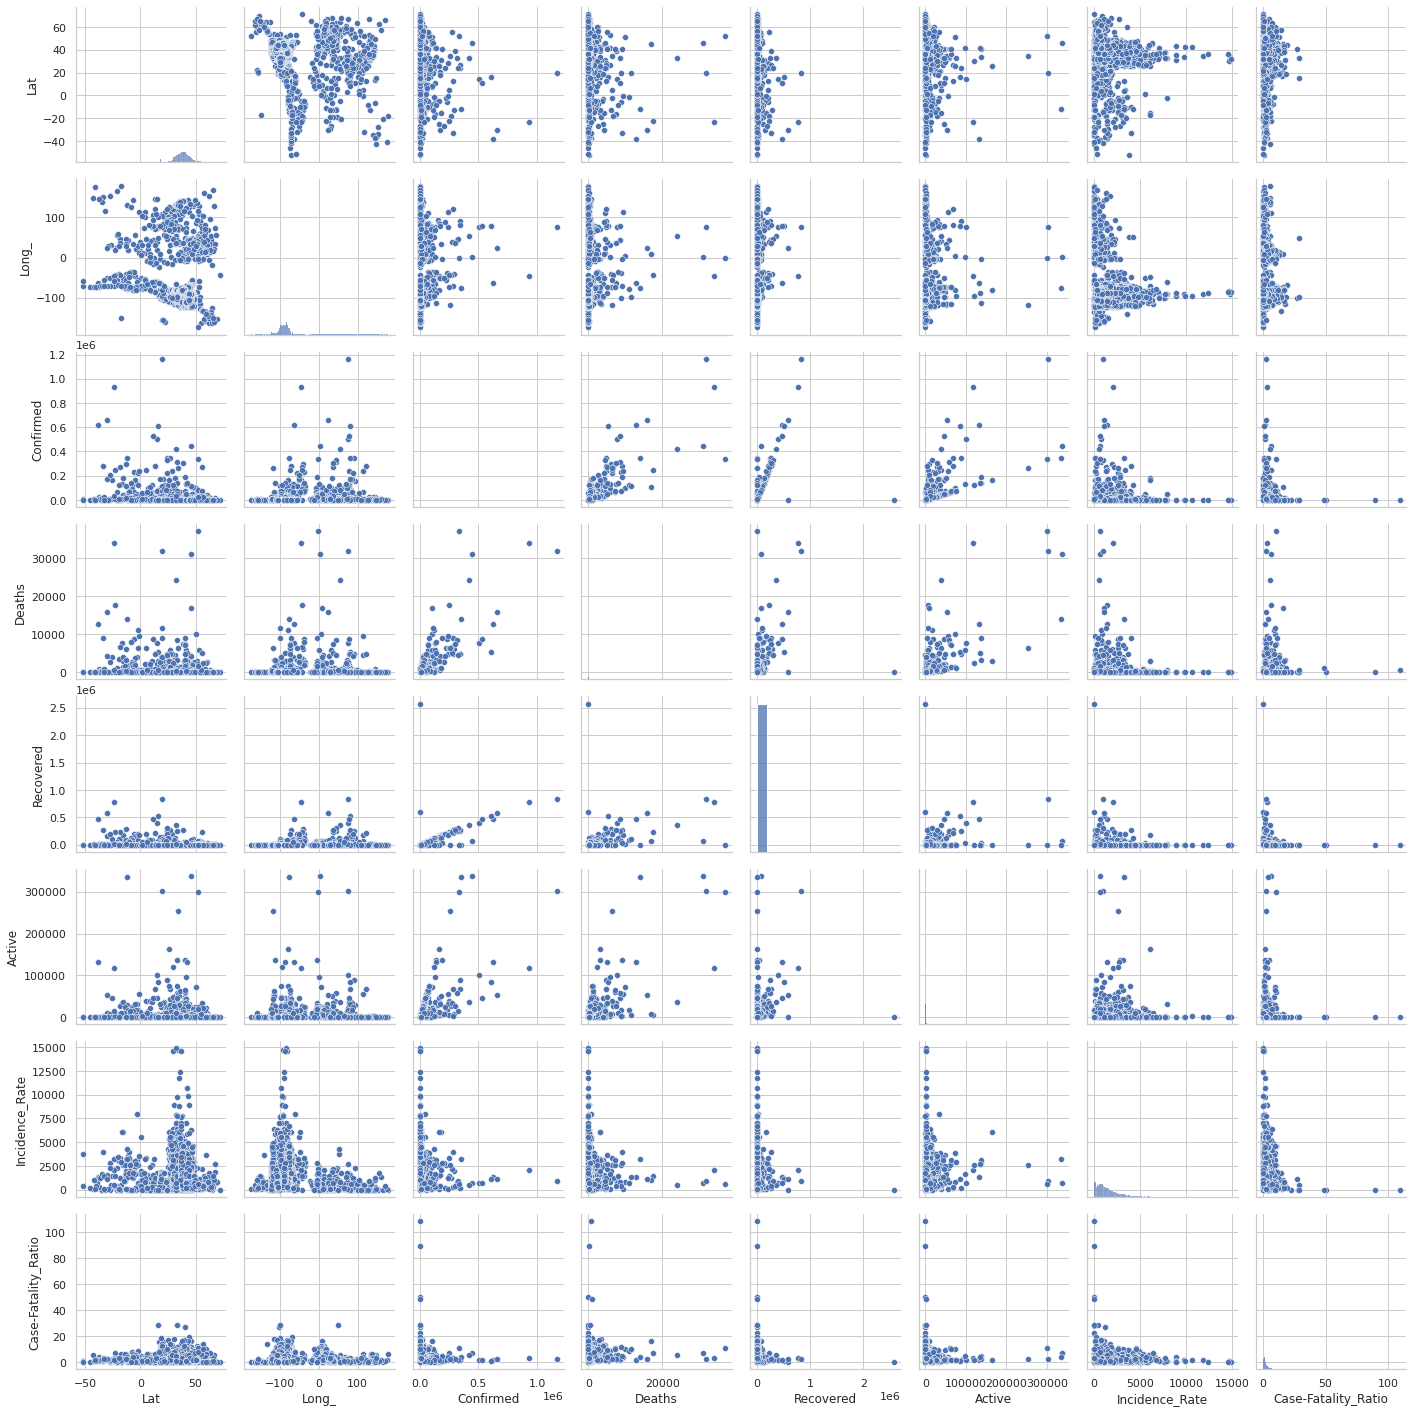

In [ ]:
sns.pairplot(location)

(0.1, 10000000)

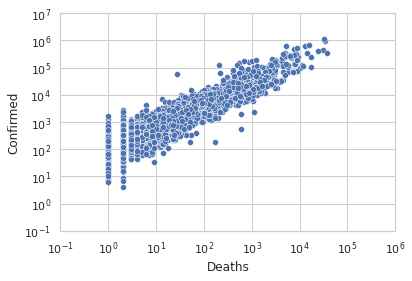

In [ ]:
plot = sns.scatterplot(x="Deaths", y="Confirmed", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 1000000)
plot.set_ylim(0.1, 10000000)

(0.1, 10000000)

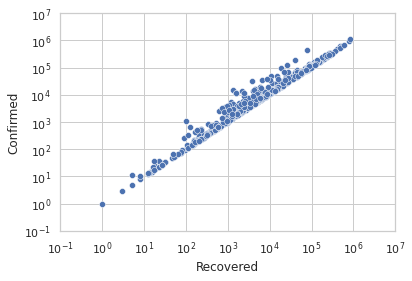

In [ ]:
plot = sns.scatterplot(x="Recovered", y="Confirmed", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 10000000)
plot.set_ylim(0.1, 10000000)

(0.1, 10000000)

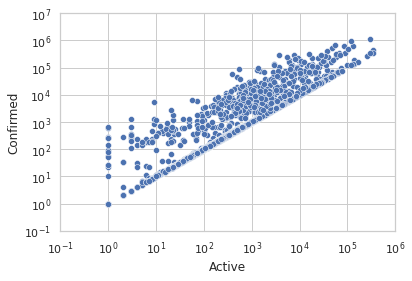

In [ ]:
plot = sns.scatterplot(x="Active", y="Confirmed", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 1000000)
plot.set_ylim(0.1, 10000000)

(0.1, 5000000)

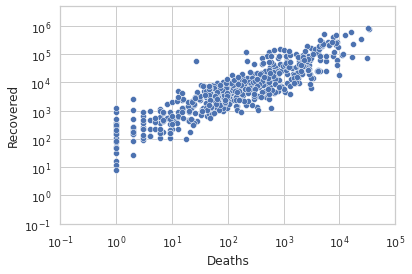

In [ ]:
plot = sns.scatterplot(x="Deaths", y="Recovered", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 100000)
plot.set_ylim(0.1, 5000000)

(0.1, 1000000)

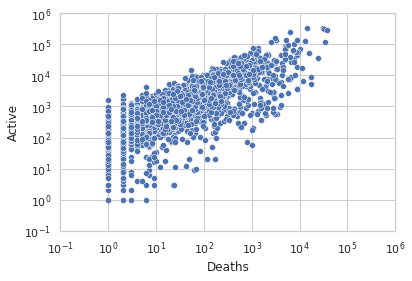

In [ ]:
plot = sns.scatterplot(x="Deaths", y="Active", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 1000000)
plot.set_ylim(0.1, 1000000)

(0.1, 1000000)

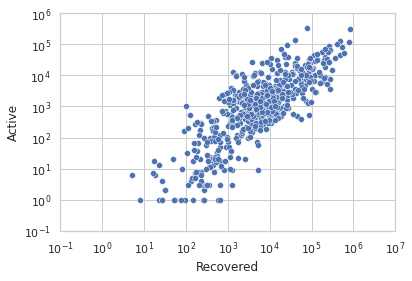

In [ ]:
plot = sns.scatterplot(x="Recovered", y="Active", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 10000000)
plot.set_ylim(0.1, 1000000)

(0.1, 100)

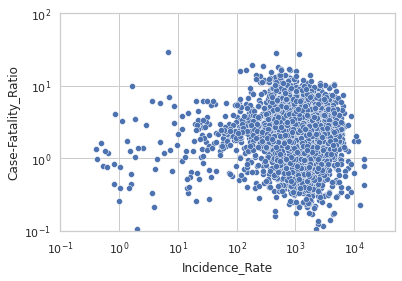

In [ ]:
plot = sns.scatterplot(x="Incidence_Rate", y="Case-Fatality_Ratio", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 50000)
plot.set_ylim(0.1, 100)

(0.1, 5000000)

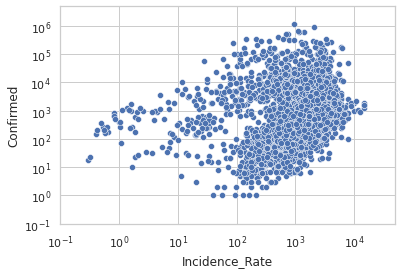

In [ ]:
plot = sns.scatterplot(x="Incidence_Rate", y="Confirmed", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 50000)
plot.set_ylim(0.1, 5000000)

(0.1, 100000)

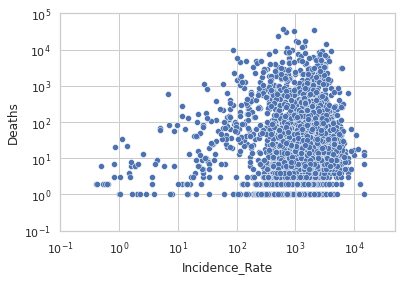

In [ ]:
plot = sns.scatterplot(x="Incidence_Rate", y="Deaths", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 50000)
plot.set_ylim(0.1, 100000)

(0.1, 5000000)

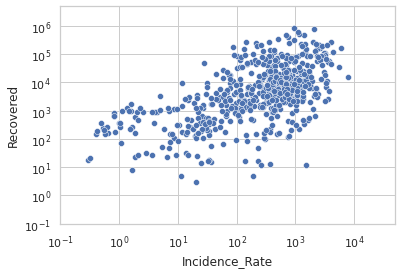

In [ ]:
plot = sns.scatterplot(x="Incidence_Rate", y="Recovered", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 50000)
plot.set_ylim(0.1, 5000000)

(0.1, 5000000)

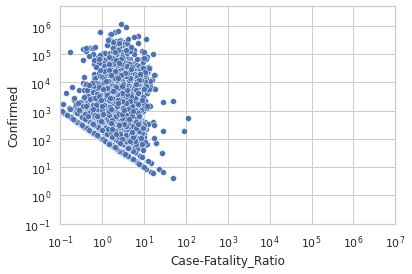

In [ ]:
plot = sns.scatterplot(x="Case-Fatality_Ratio", y="Confirmed", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 10000000)
plot.set_ylim(0.1, 5000000)

(0.1, 5000000)

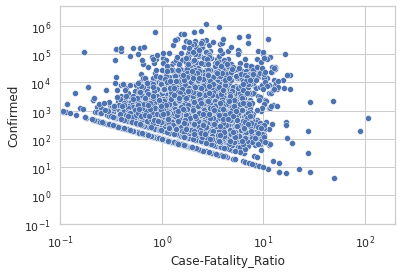

In [ ]:
plot = sns.scatterplot(x="Case-Fatality_Ratio", y="Confirmed", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 200)
plot.set_ylim(0.1, 5000000)

(0.1, 100000)

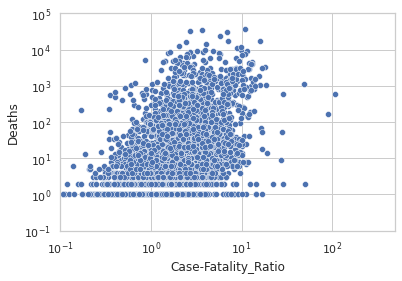

In [ ]:
plot = sns.scatterplot(x="Case-Fatality_Ratio", y="Deaths", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 500)
plot.set_ylim(0.1, 100000)

(0.1, 5000000)

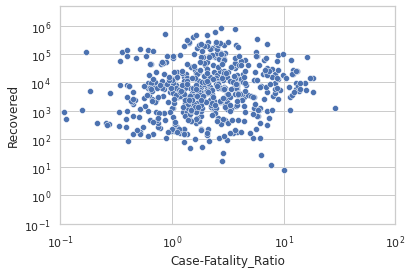

In [ ]:
plot = sns.scatterplot(x="Case-Fatality_Ratio", y="Recovered", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 100)
plot.set_ylim(0.1, 5000000)

(0.1, 5000000)

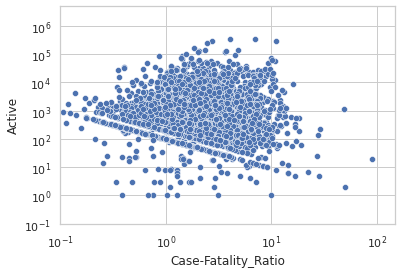

In [ ]:
plot = sns.scatterplot(x="Case-Fatality_Ratio", y="Active", data=location)
plot.set(xscale="log")
plot.set(yscale="log")
plot.set_xlim(0.1, 150)
plot.set_ylim(0.1, 5000000)

In [ ]:
location.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3874.000000,3874.000000,3.954000e+03,3954.000000,3.954000e+03,3954.000000,3954.000000,3954.000000
mean,35.987924,-72.337046,7.760496e+03,241.740769,5.291398e+03,3029.796156,1507.443368,2.327219
std,12.872793,53.019022,4.184036e+04,1476.661533,5.315287e+04,14028.377970,1371.755954,3.526406
min,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.270421,-96.611164,1.370000e+02,1.000000,0.000000e+00,113.250000,580.130962,0.605942
50%,37.938284,-86.878438,4.985000e+02,9.000000,0.000000e+00,421.000000,1170.634700,1.613843
75%,42.158587,-77.639009,2.129000e+03,48.000000,0.000000e+00,1452.500000,2055.421835,2.985075
max,71.706900,178.065000,1.167496e+06,37076.000000,2.577446e+06,337913.000000,14871.183644,108.812950


In [ ]:
location['Confirmed'].replace(0,1,inplace=True)
location['Deaths'].replace(0,1,inplace=True)
location['Recovered'].replace(0,1,inplace=True)
location['Active'].replace(0,1,inplace=True)
location['Incidence_Rate'].replace(0,1,inplace=True)
location['Case-Fatality_Ratio'].replace(0,1,inplace=True)

In [ ]:
# location['Confirmed'] = np.log10(location['Confirmed'])
# location['Deaths'] = np.log10(location['Deaths'])
# location['Recovered'] = np.log10(location['Recovered'])
# location['Active'] = np.log10(location['Active'])
# location['Incidence_Rate'] = np.log10(location['Incidence_Rate'])
# location['Case-Fatality_Ratio'] = np.log10(location['Case-Fatality_Ratio'])
location.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3874.000000,3874.000000,3.954000e+03,3954.000000,3.954000e+03,3954.000000,3954.000000,3954.000000
mean,35.987924,-72.337046,7.760508e+03,241.923369,5.292243e+03,3029.818918,1507.466383,2.510830
std,12.872793,53.019022,4.184036e+04,1476.631682,5.315278e+04,14028.373054,1371.730664,3.425004
min,-52.368000,-174.159600,1.000000e+00,1.000000,1.000000e+00,1.000000,0.029070,0.046909
25%,33.270421,-96.611164,1.370000e+02,1.000000,1.000000e+00,113.250000,580.130962,1.000000
50%,37.938284,-86.878438,4.985000e+02,9.000000,1.000000e+00,421.000000,1170.634700,1.613843
75%,42.158587,-77.639009,2.129000e+03,48.000000,1.000000e+00,1452.500000,2055.421835,2.985075
max,71.706900,178.065000,1.167496e+06,37076.000000,2.577446e+06,337913.000000,14871.183644,108.812950


#1.3 Dealing with outliers

In [ ]:
location_o = location.copy()
location_o.rename(columns={'Case-Fatality_Ratio': 'Case_Fatality_Ratio'}, inplace=True)

threshold = 3

Confirmed_z = np.abs(stats.zscore(location_o.Confirmed))
location_o['Confirmed_zscore'] = Confirmed_z
location_o = location_o[(Confirmed_z<3)]

Deaths_z = np.abs(stats.zscore(location_o.Deaths))
location_o['Deaths_zscore'] = Deaths_z
location_o = location_o[(Deaths_z<3)]

Recovered_z = np.abs(stats.zscore(location_o.Recovered))
location_o['Recovered_zscore'] = Recovered_z
location_o = location_o[(Recovered_z<3)]

Active_z = np.abs(stats.zscore(location_o.Active))
location_o['Active_zscore'] = Active_z
location_o = location_o[(Active_z<3)]

Incidence_Rate_z = np.abs(stats.zscore(location_o.Incidence_Rate))
location_o['Incidence_Rate_zscore'] = Incidence_Rate_z
location_o = location_o[(Incidence_Rate_z<3)]

Case_Fatality_Ratio_z = np.abs(stats.zscore(location_o.Case_Fatality_Ratio))
location_o['Case_Fatality_Ratio_zscore'] = Case_Fatality_Ratio_z
location_o = location_o[(Case_Fatality_Ratio_z<3)]

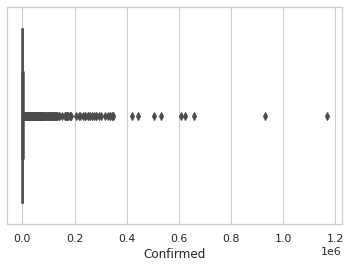

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location["Confirmed"])

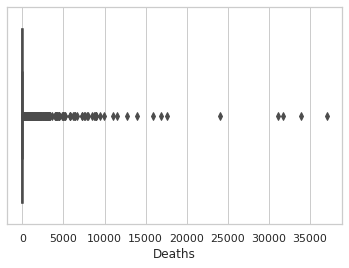

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location["Deaths"])

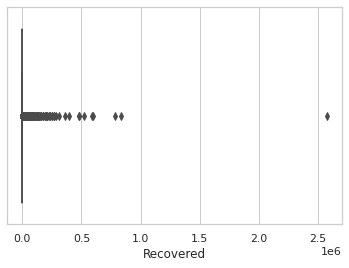

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location["Recovered"])

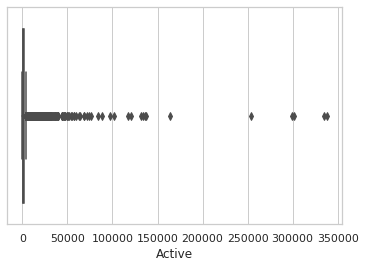

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location["Active"])

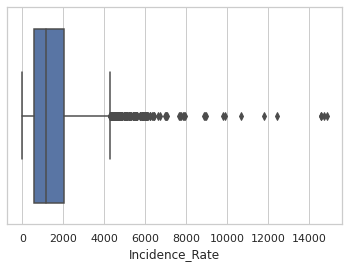

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location["Incidence_Rate"])

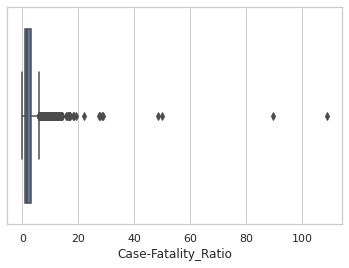

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location["Case-Fatality_Ratio"])

In [ ]:
location_log = location.copy()
location_log['Confirmed_log'] = np.log10(location['Confirmed'])
location_log['Deaths_log'] = np.log10(location['Deaths'])
location_log['Recovered_log'] = np.log10(location['Recovered'])
location_log['Active_log'] = np.log10(location['Active'])
location_log['Incidence_Rate_log'] = np.log10(location['Incidence_Rate'])
location_log['Case-Fatality_Ratio_log'] = np.log10(location['Case-Fatality_Ratio'])

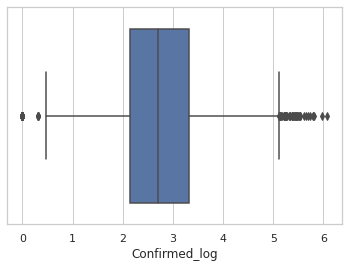

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location_log["Confirmed_log"])

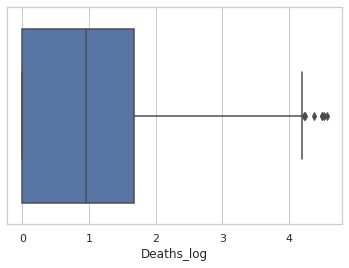

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location_log["Deaths_log"])

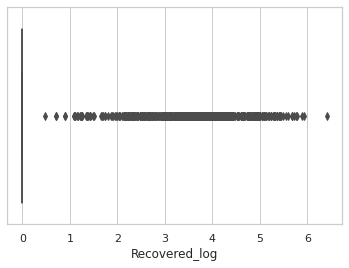

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location_log["Recovered_log"])

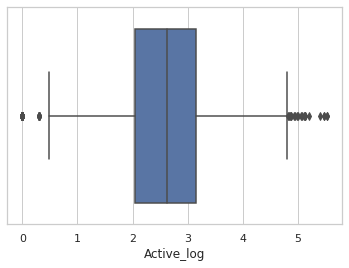

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location_log["Active_log"])

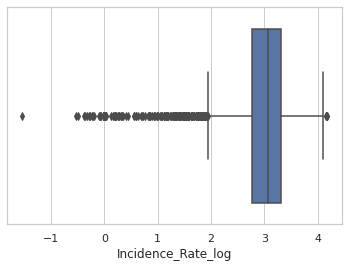

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location_log["Incidence_Rate_log"])

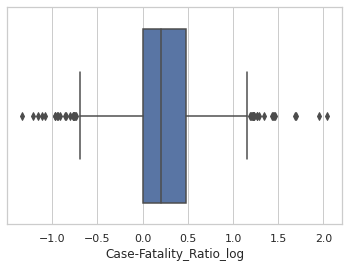

In [ ]:
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x=location_log["Case-Fatality_Ratio_log"])

#1.4 Transformation

In [ ]:
US = location[location["Country_Region"] == "US"]
states = pd.DataFrame(US["Province_State"].unique()).values
locationTransformed = pd.DataFrame(columns = location.columns)
for state in states:
  latitude = longitude = confirmed = deaths = recovered = active = incidenceRate = temp = 0
  for i in range(US.shape[0]):
    temp += 1
    province = US.iloc[i]
    if province["Province_State"] == state:
      confirmed += province["Confirmed"]
      deaths += province["Deaths"]
      recovered += province["Recovered"]
      active += province["Active"]
      incidenceRate += province["Incidence_Rate"]
      if not math.isnan(province["Lat"]):
        latitude = province["Lat"]
      if not math.isnan(province["Long_"]):
        longitude = province["Long_"]

  locationTransformed = locationTransformed.append(pd.DataFrame({"Province_State": state, "Country_Region": "US", "Last_Update": "WIP", "Lat": latitude, "Long_": longitude, "Confirmed": confirmed, "Deaths": deaths, "Recovered": recovered, "Active": active, "Combined_Key": (state + ", US")}), ignore_index = True)


locationTransformed

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Alabama,US,WIP,34.150305,-87.373259,144164,2437,0,141727.0,"Alabama, US",NaN,NaN
1,Alaska,US,WIP,65.508155,-151.390739,6729,45,0,6684.0,"Alaska, US",NaN,NaN
2,Arizona,US,WIP,32.768957,-113.906667,212942,5451,0,207491.0,"Arizona, US",NaN,NaN
3,Arkansas,US,WIP,35.002924,-93.411713,75160,1181,0,73979.0,"Arkansas, US",NaN,NaN
4,California,US,WIP,39.262559,-121.353564,783313,15018,0,768295.0,"California, US",NaN,NaN
5,Colorado,US,WIP,40.003468,-102.425867,64336,2013,0,62323.0,"Colorado, US",NaN,NaN
6,Connecticut,US,WIP,41.829727,-71.981823,55527,4492,0,51035.0,"Connecticut, US",NaN,NaN
7,Delaware,US,WIP,38.661438,-75.390313,19449,621,0,18828.0,"Delaware, US",NaN,NaN
8,Diamond Princess,US,WIP,0.000000,0.000000,49,0,0,49.0,"Diamond Princess, US",NaN,NaN
9,District of Columbia,US,WIP,38.904178,-77.016560,14902,619,0,14283.0,"District of Columbia, US",NaN,NaN


In [ ]:
merged = pd.merge(locationTransformed, population, left_on="Combined_Key", right_on="Combined_Key")

merged = merged.drop(['Last_Update', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State_y', 'Country_Region_y', 'Lat_y', 'Long__y'], axis = 1)
merged = merged[merged['Province_State_x'] != 'Recovered'] 
merged['Incidence_Rate'] = merged['Confirmed'] / merged['Population'] * 100000
merged['Case-Fatality_Ratio'] = merged['Deaths'] / merged['Confirmed'] * 100
merged

,Province_State_x,Country_Region_x,Lat_x,Long__x,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Population
0,Alabama,US,34.150305,-87.373259,144164,2437,0,141727.0,"Alabama, US",2940.21,1.69044,4903185.0
1,Alaska,US,65.508155,-151.390739,6729,45,0,6684.0,"Alaska, US",919.834,0.668747,731545.0
2,Arizona,US,32.768957,-113.906667,212942,5451,0,207491.0,"Arizona, US",2925.54,2.55985,7278717.0
3,Arkansas,US,35.002924,-93.411713,75160,1181,0,73979.0,"Arkansas, US",2490.55,1.57131,3017804.0
4,California,US,39.262559,-121.353564,783313,15018,0,768295.0,"California, US",1982.46,1.91724,39512223.0
5,Colorado,US,40.003468,-102.425867,64336,2013,0,62323.0,"Colorado, US",1117.19,3.12889,5758736.0
6,Connecticut,US,41.829727,-71.981823,55527,4492,0,51035.0,"Connecticut, US",1557.43,8.08976,3565287.0
7,Delaware,US,38.661438,-75.390313,19449,621,0,18828.0,"Delaware, US",1997.3,3.19297,973764.0
8,Diamond Princess,US,0.000000,0.000000,49,0,0,49.0,"Diamond Princess, US",NaN,0,NaN
9,District of Columbia,US,38.904178,-77.016560,14902,619,0,14283.0,"District of Columbia, US",2111.52,4.1538,705749.0


In [ ]:
merged.columns = ['Province', 'Country', 'Latitude', 'Longitude', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'combinedKey', 'incidenceRate', 'cases-fatality-ratio', 'Population']
merged

,Province,Country,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,combinedKey,incidenceRate,cases-fatality-ratio,Population
0,Alabama,US,34.150305,-87.373259,144164,2437,0,141727.0,"Alabama, US",2940.21,1.69044,4903185.0
1,Alaska,US,65.508155,-151.390739,6729,45,0,6684.0,"Alaska, US",919.834,0.668747,731545.0
2,Arizona,US,32.768957,-113.906667,212942,5451,0,207491.0,"Arizona, US",2925.54,2.55985,7278717.0
3,Arkansas,US,35.002924,-93.411713,75160,1181,0,73979.0,"Arkansas, US",2490.55,1.57131,3017804.0
4,California,US,39.262559,-121.353564,783313,15018,0,768295.0,"California, US",1982.46,1.91724,39512223.0
5,Colorado,US,40.003468,-102.425867,64336,2013,0,62323.0,"Colorado, US",1117.19,3.12889,5758736.0
6,Connecticut,US,41.829727,-71.981823,55527,4492,0,51035.0,"Connecticut, US",1557.43,8.08976,3565287.0
7,Delaware,US,38.661438,-75.390313,19449,621,0,18828.0,"Delaware, US",1997.3,3.19297,973764.0
8,Diamond Princess,US,0.000000,0.000000,49,0,0,49.0,"Diamond Princess, US",NaN,0,NaN
9,District of Columbia,US,38.904178,-77.016560,14902,619,0,14283.0,"District of Columbia, US",2111.52,4.1538,705749.0


In [ ]:
location = location[location['Country_Region'] != 'US']

In [ ]:
location.append(merged)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Province_State_x,Country_Region_x,Lat_x,Long__x,Population
0,NaN,Afghanistan,2020-09-20 04:22:56,33.93911,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976,3.69228,NaN,NaN,NaN,NaN,NaN
1,NaN,Albania,2020-09-20 04:22:56,41.15330,20.168300,12226,358,6888,4980.0,Albania,424.838,2.92819,NaN,NaN,NaN,NaN,NaN
2,NaN,Algeria,2020-09-20 04:22:56,28.03390,1.659600,49623,1665,34923,13035.0,Algeria,113.163,3.3553,NaN,NaN,NaN,NaN,NaN
3,NaN,Andorra,2020-09-20 04:22:56,42.50630,1.521800,1564,53,1164,347.0,Andorra,2024.2,3.38875,NaN,NaN,NaN,NaN,NaN
4,NaN,Angola,2020-09-20 04:22:56,-11.20270,17.873900,3901,147,1445,2309.0,Angola,11.8693,3.76826,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,NaN,NaN,NaN,NaN,NaN,139546,2988,0,136558.0,"Virginia, US",1634.89,2.14123,Virginia,US,37.243748,-76.544128,8535519.0
54,NaN,NaN,NaN,NaN,NaN,82199,2037,0,80162.0,"Washington, US",1079.45,2.47813,Washington,US,46.457385,-120.738013,7614893.0
55,NaN,NaN,NaN,NaN,NaN,13889,311,0,13578.0,"West Virginia, US",774.992,2.23918,West Virginia,US,37.612327,-81.545111,1792147.0
56,NaN,NaN,NaN,NaN,NaN,97279,1238,0,96041.0,"Wisconsin, US",1670.76,1.27263,Wisconsin,US,44.455379,-90.041583,5822434.0


#1.5 Joining the cases and location dataset

1. The training dataset and the location will be joined by first making a combined key for the location dataset and then performing a left join. We cannot use longitude/latitude values as the training dataset and location dataset seem to have slightly different values for the same location.

2. We perform a left join on the datasets so that we ensure that we retain all the records in the training set, and simply use the location dataset to make the data more detailed. Moreover, performing a left join will ensure that only the rows that have the same combinedkey as rows in training dataset will be added, ensuring that there is no redundant information.

3. We drop the repeated lat/long columns & both sets of province and country as they are redundant. If one finds lat/long hard to interpret, they can refer to Combined_key which provices province and country.

4. By joining the two dataframes, we receive several important columns of information, each correctly with their location.

In [ ]:
casesTrain.head()

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized
3,15-34,female,Baden-Wurttemberg,Germany,48.120860,7.849500,15.03.2020,NaN,NaN,nonhospitalized
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized


In [ ]:
location.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.93911,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.15330,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.03390,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.50630,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.20270,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265


In [ ]:
missingLocationProvince = location['Province_State'].isna().sum()
missingLocationCountry = location['Country_Region'].isna().sum()
missingLocationLat = location['Lat'].isna().sum()
missingLocationLong = location['Long_'].isna().sum()

In [ ]:
locationMerged = pd.merge(casesTrain, location,  how='left', left_on=['combinedKey'], right_on = ['Combined_Key'])
locationMerged

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome,combinedKey,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered,"Delhi, India",Delhi,India,2020-09-20 04:22:56,28.646519,77.108980,238828.0,4907.0,201671.0,32250.0,"Delhi, India",1276.409575,2.054617
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized,"Uttar Pradesh, India",Uttar Pradesh,India,2020-09-20 04:22:56,26.925425,80.560982,342788.0,4869.0,270094.0,67825.0,"Uttar Pradesh, India",144.099577,1.420411
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized,"Maharashtra, India",Maharashtra,India,2020-09-20 04:22:56,19.449759,76.108221,1167496.0,31791.0,834432.0,301273.0,"Maharashtra, India",948.072083,2.723007
3,15-34,female,Baden-Wurttemberg,Germany,48.120860,7.849500,15.03.2020,NaN,NaN,nonhospitalized,"Baden-Wurttemberg, Germany",Baden-Wurttemberg,Germany,2020-09-20 04:22:56,48.661600,9.350100,46779.0,1871.0,41228.0,3680.0,"Baden-Wurttemberg, Germany",422.592353,3.999658
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized,"Gujarat, India",Gujarat,India,2020-09-20 04:22:56,22.694884,71.590923,120336.0,3286.0,100974.0,16076.0,"Gujarat, India",188.400627,2.730687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367631,15.0,male,Santa Fe,Argentina,-32.967800,-60.659240,31.03.2020,NaN,NaN,nonhospitalized,"Santa Fe, Argentina",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367632,NaN,NaN,Delhi,India,28.614740,77.209100,16.04.2020,NaN,https://twitter.com/ANI/status/125082767765900...,hospitalized,"Delhi, India",Delhi,India,2020-09-20 04:22:56,28.646519,77.108980,238828.0,4907.0,201671.0,32250.0,"Delhi, India",1276.409575,2.054617
367633,NaN,NaN,Maharashtra,India,19.200000,72.966670,30.05.2020,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,hospitalized,"Maharashtra, India",Maharashtra,India,2020-09-20 04:22:56,19.449759,76.108221,1167496.0,31791.0,834432.0,301273.0,"Maharashtra, India",948.072083,2.723007
367634,28,female,NaN,Singapore,1.280224,103.834500,03.02.2020,Case 19; worked at health product shop with ma...,https://www.moh.gov.sg/news-highlights/details...,recovered,Singapore,NaN,Singapore,2020-09-20 04:22:56,1.283300,103.833300,57558.0,27.0,57142.0,389.0,Singapore,983.839751,0.046909


In [ ]:
locationMerged.drop(['Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1)
missingLocationMerged = locationMerged.isna().sum()


In [ ]:
data = locationMerged[['date_confirmation', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incidence_Rate', 'Case-Fatality_Ratio']]
data = data.groupby('date_confirmation').sum()
plot = sns.relplot(x="date_confirmation", y="Confirmed", data=data, kind="line")
plot = sns.relplot(x="date_confirmation", y="Deaths", data=data, kind="line")
plot = sns.relplot(x="date_confirmation", y="Recovered", data=data, kind="line")
plot = sns.relplot(x="date_confirmation", y="Active", data=data, kind="line")
plot = sns.relplot(x="date_confirmation", y="Incidence_Rate", data=data, kind="line")
plot = sns.relplot(x="date_confirmation", y="Case-Fatality_Ratio", data=data, kind="line")

In [ ]:
casesTest.head()

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome,combinedKey
0,NaN,NaN,Rajasthan,India,24.587000,73.69848,11.05.2020,NaN,https://t.me/indiacovid/4565,NaN,"Rajasthan, India"
1,15-34,male,Bayern,Germany,49.993767,9.66288,09.04.2020,NaN,NaN,NaN,"Bayern, Germany"
2,NaN,NaN,Maharashtra,India,19.200000,72.96667,23.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN,"Maharashtra, India"
3,NaN,NaN,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,NaN,https://twitter.com/JansamparkMP/status/126384...,NaN,"Madhya Pradesh, India"
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,NaN,NaN,NaN,"Lima, Peru"


In [ ]:
locationTestMerged = pd.merge(casesTest, location,  how='left', left_on=['combinedKey'], right_on = ['Combined_Key'])
locationTestMerged

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome,combinedKey,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Rajasthan,India,24.587000,73.69848,11.05.2020,NaN,https://t.me/indiacovid/4565,NaN,"Rajasthan, India",Rajasthan,India,2020-09-20 04:22:56,26.583423,73.847973,111290.0,1308.0,92265.0,17717.0,"Rajasthan, India",137.339636,1.175308
1,15-34,male,Bayern,Germany,49.993767,9.66288,09.04.2020,NaN,NaN,NaN,"Bayern, Germany",Bayern,Germany,2020-09-20 04:22:56,48.790400,11.497900,64465.0,2648.0,56398.0,5419.0,"Bayern, Germany",492.975265,4.107655
2,NaN,NaN,Maharashtra,India,19.200000,72.96667,23.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN,"Maharashtra, India",Maharashtra,India,2020-09-20 04:22:56,19.449759,76.108221,1167496.0,31791.0,834432.0,301273.0,"Maharashtra, India",948.072083,2.723007
3,NaN,NaN,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,NaN,https://twitter.com/JansamparkMP/status/126384...,NaN,"Madhya Pradesh, India",Madhya Pradesh,India,2020-09-20 04:22:56,23.541513,78.289633,100458.0,1901.0,76952.0,21605.0,"Madhya Pradesh, India",117.688868,1.892333
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,NaN,NaN,NaN,"Lima, Peru",Lima,Peru,2020-09-20 04:22:56,-11.766533,-76.604498,349167.0,14009.0,0.0,335158.0,"Lima, Peru",3285.195465,4.012120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46495,22,female,Caaguazu,Paraguay,-25.468250,-56.01425,22.05.2020,NaN,NaN,NaN,"Caaguazu, Paraguay",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46496,21,male,Lima,Peru,-12.043180,-77.02824,04.05.2020,NaN,NaN,NaN,"Lima, Peru",Lima,Peru,2020-09-20 04:22:56,-11.766533,-76.604498,349167.0,14009.0,0.0,335158.0,"Lima, Peru",3285.195465,4.012120
46497,73,male,Karnataka,India,14.029390,74.97440,02.04.2020,"Travelled to Delhi,",https://twitter.com/ANI/status/124564120884981...,NaN,"Karnataka, India",Karnataka,India,2020-09-20 04:22:56,14.705180,76.166436,502982.0,7808.0,394026.0,101148.0,"Karnataka, India",744.467146,1.552342
46498,33,female,Lima,Peru,-11.932980,-77.04085,22.04.2020,NaN,NaN,NaN,"Lima, Peru",Lima,Peru,2020-09-20 04:22:56,-11.766533,-76.604498,349167.0,14009.0,0.0,335158.0,"Lima, Peru",3285.195465,4.012120


In [ ]:
locationTestMerged.drop(['Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1)


,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome,combinedKey,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Rajasthan,India,24.587000,73.69848,11.05.2020,NaN,https://t.me/indiacovid/4565,NaN,"Rajasthan, India",2020-09-20 04:22:56,111290.0,1308.0,92265.0,17717.0,137.339636,1.175308
1,15-34,male,Bayern,Germany,49.993767,9.66288,09.04.2020,NaN,NaN,NaN,"Bayern, Germany",2020-09-20 04:22:56,64465.0,2648.0,56398.0,5419.0,492.975265,4.107655
2,NaN,NaN,Maharashtra,India,19.200000,72.96667,23.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN,"Maharashtra, India",2020-09-20 04:22:56,1167496.0,31791.0,834432.0,301273.0,948.072083,2.723007
3,NaN,NaN,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,NaN,https://twitter.com/JansamparkMP/status/126384...,NaN,"Madhya Pradesh, India",2020-09-20 04:22:56,100458.0,1901.0,76952.0,21605.0,117.688868,1.892333
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,NaN,NaN,NaN,"Lima, Peru",2020-09-20 04:22:56,349167.0,14009.0,0.0,335158.0,3285.195465,4.012120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46495,22,female,Caaguazu,Paraguay,-25.468250,-56.01425,22.05.2020,NaN,NaN,NaN,"Caaguazu, Paraguay",NaN,NaN,NaN,NaN,NaN,NaN,NaN
46496,21,male,Lima,Peru,-12.043180,-77.02824,04.05.2020,NaN,NaN,NaN,"Lima, Peru",2020-09-20 04:22:56,349167.0,14009.0,0.0,335158.0,3285.195465,4.012120
46497,73,male,Karnataka,India,14.029390,74.97440,02.04.2020,"Travelled to Delhi,",https://twitter.com/ANI/status/124564120884981...,NaN,"Karnataka, India",2020-09-20 04:22:56,502982.0,7808.0,394026.0,101148.0,744.467146,1.552342
46498,33,female,Lima,Peru,-11.932980,-77.04085,22.04.2020,NaN,NaN,NaN,"Lima, Peru",2020-09-20 04:22:56,349167.0,14009.0,0.0,335158.0,3285.195465,4.012120
